In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

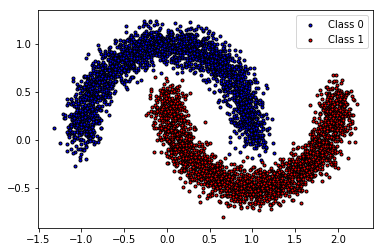

In [2]:
# loading data
X, Y = make_moons(n_samples = 5000, noise = 0.1)
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color = "blue", edgecolors = "black", marker = '.', label = "Class 0")
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color = "red", edgecolors = "black", marker = '.', label = "Class 1")
plt.legend()
plt.show()

In [3]:
# data normalization
mu = X.mean()
sigma = X.std()
X = (X - mu) / sigma

In [4]:
# train-test split
split_factor = 0.7
split = int(split_factor*X.shape[0])
X_train = X[:split, :].T
Y_train = Y[:split].reshape((1, -1))
X_test = X[split:, :].T
Y_test = Y[split:].reshape((1, -1))

In [5]:
# initializing parameters
def initilize_parameters(layers_dims):
    np.random.seed(5)
    parameters = {}
    L = len(layers_dims)
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.rand(layers_dims[l], layers_dims[l - 1])*0.01
        parameters["b" + str(l)] = np.random.rand(layers_dims[l], 1)*0.01
    return parameters

In [6]:
# forward propagation
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(Z, 0)

def tanh(Z):
    return np.tanh(Z)

def fprop(A_prev, W, b, activation):
    Z = np.dot(W, A_prev) + b
    if activation == "relu":
        A = relu(Z)
    elif activation == "sigmoid":
        A = sigmoid(Z)
    elif activation == "tanh":
        A = tanh(Z)
    return Z, A

def forward_propagation(X, parameters):
    caches = []
    L = len(parameters) // 2
    A_prev = X
    for l in range(1, L):
        W = parameters["W" + str(l)]
        b = parameters["b" + str(l)]
        Z, A = fprop(A_prev, W, b, "tanh")
        cache = (A_prev, Z, W, b)
        caches.append(cache)
        A_prev = A
    W = parameters["W" + str(L)]
    b = parameters["b" + str(L)]
    Z, AL = fprop(A_prev, W, b, "sigmoid")
    cache = (A_prev, Z, W, b)
    caches.append(cache)
    return AL, caches

In [7]:
# compute cost
def compute_cost(AL, Y):
    m = Y.shape[1]
    logprob = -np.sum((Y*np.log(AL) + (1 - Y)*np.log(1 - AL)))
    cost = logprob / m
    cost = np.squeeze(cost)
    return cost

In [8]:
# backward propagation
def dsigmoid(Z):
    A = sigmoid(Z)
    return A*(1 - A)

def drelu(Z):
    Z[Z > 0] = 1
    Z[Z < 0] = 0
    return Z

def dtanh(Z):
    A = tanh(Z)
    return (1 - np.square(A))

def bprop(dA, cache, activation):
    A_prev, Z, W, b = cache
    L = len(cache)
    m = A_prev.shape[1]
    dZ = None
    if activation == "relu":
        dZ = dA*drelu(Z)
    elif activation == "sigmoid":
        dZ = dA*dsigmoid(Z)
    elif activation == "tanh":
        dZ = dA*dtanh(Z)
    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis = 1, keepdims = True) / m
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW, db

def backward_propagation(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = -(np.divide(Y, AL) - np.divide((1 - Y), (1 - AL)))
    current_cache = caches[L - 1]
    A_prev, Z, W, b = current_cache
    dA_prev, dW, db = bprop(dAL, current_cache, "sigmoid")
    grads["dA" + str(L - 1)] = dA_prev
    grads["dW" + str(L)] = dW
    grads["db" + str(L)] = db
    for l in reversed(range(1, L)):
        current_cache = caches[l - 1]
        A_prev, Z, W, b = current_cache
        dA_prev, dW, db = bprop(grads["dA" + str(l)], current_cache, "tanh")
        grads["dA" + str(l - 1)] = dA_prev
        grads["dW" + str(l)] = dW
        grads["db" + str(l)] = db
    return grads

In [9]:
# update parameters
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(1, L + 1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*grads["db" + str(l)]
    return parameters

In [10]:
# defining model
def model(X, Y, layers_dims, num_iters, learning_rate):
    parameters = initilize_parameters(layers_dims)
    costs = []
    for i in range(num_iters):
        AL, caches = forward_propagation(X, parameters)
        cost = compute_cost(AL, Y)
        costs.append(cost)
        if i % 300 == 0:
            print("Cost after %d iterations = %f"%(i, cost))
        grads = backward_propagation(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
    return parameters, costs

def predict(X, parameters):
    AL, _ = forward_propagation(X, parameters)
    pred = np.zeros(AL.shape)
    pred[AL > 0.5] = 1
    pred = pred.astype(np.uint64)
    return pred

Cost after 0 iterations = 0.693118
Cost after 300 iterations = 0.258709
Cost after 600 iterations = 0.257917
Cost after 900 iterations = 0.257218
Cost after 1200 iterations = 0.256463
Cost after 1500 iterations = 0.253958
Cost after 1800 iterations = 0.247421
Cost after 2100 iterations = 0.238486
Cost after 2400 iterations = 0.009838
Cost after 2700 iterations = 0.005093
Cost after 3000 iterations = 0.003986
Cost after 3300 iterations = 0.003512
Cost after 3600 iterations = 0.003239
Cost after 3900 iterations = 0.003050
Cost after 4200 iterations = 0.002906
Cost after 4500 iterations = 0.002789
Cost after 4800 iterations = 0.002690


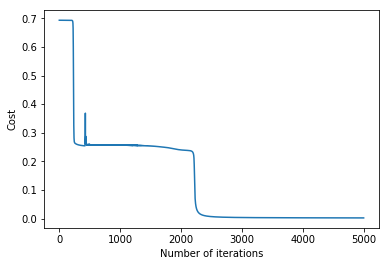

In [11]:
# training parameters and plotting cost variation
layer_dims = [X_train.shape[0], 7, 4, 1]
parameters, costs = model(X_train, Y_train, layer_dims, 5000, 0.95)
plt.plot(costs)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

In [12]:
# making predictions and finding accuracy on training data
Y_pred = predict(X_train, parameters)
accuracy = np.sum(Y_pred == Y_train) / Y_pred.shape[1]
print("Accuracy on training data = %f"%accuracy)

Accuracy on training data = 0.999143


In [13]:
# making predictions and finding accuracy on testing data
Y_pred = predict(X_test, parameters)
accuracy = np.sum(Y_pred == Y_test) / Y_pred.shape[1]
print("Accuracy on training data = %f"%accuracy)

Accuracy on training data = 0.998000


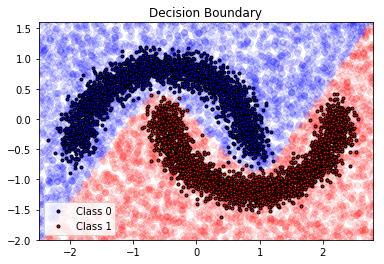

In [14]:
# decision boundary
X_temp = np.random.rand(2, 10000)*6 - 2.8
Y_temp = predict(X_temp, parameters)
for i in range(X_temp.shape[1]):
    if Y_temp[:, i] == 0:
        plt.scatter(X_temp[0, i], X_temp[1, i], color = "blue", alpha = 0.1)
    else:
        plt.scatter(X_temp[0, i], X_temp[1, i], color = "red", alpha = 0.1)
plt.title("Decision Boundary")
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color = "blue", edgecolors = "black", marker = '.', label = "Class 0")
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color = "red", edgecolors = "black", marker = '.', label = "Class 1")
plt.legend()
plt.xlim(-2.5, 2.8)
plt.ylim(-2, 1.6)
plt.show()